In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('insurance.csv')
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 8)

In [5]:
df.describe()

,index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [7]:
df.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
numeric=df.select_dtypes(include=["int64", "float64"])
numeric

,index,age,bmi,children,charges
0,0,19,27.900,0,16884.92400
1,1,18,33.770,1,1725.55230
2,2,28,33.000,3,4449.46200
3,3,33,22.705,0,21984.47061
4,4,32,28.880,0,3866.85520
...,...,...,...,...,...
1333,1333,50,30.970,3,10600.54830
1334,1334,18,31.920,0,2205.98080
1335,1335,18,36.850,0,1629.83350
1336,1336,21,25.800,0,2007.94500


<Axes: >

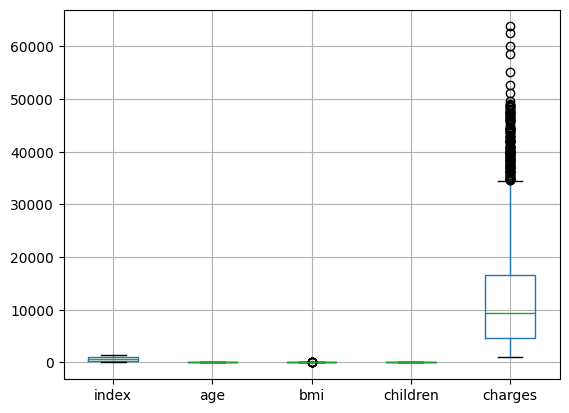

In [9]:
numeric.boxplot()

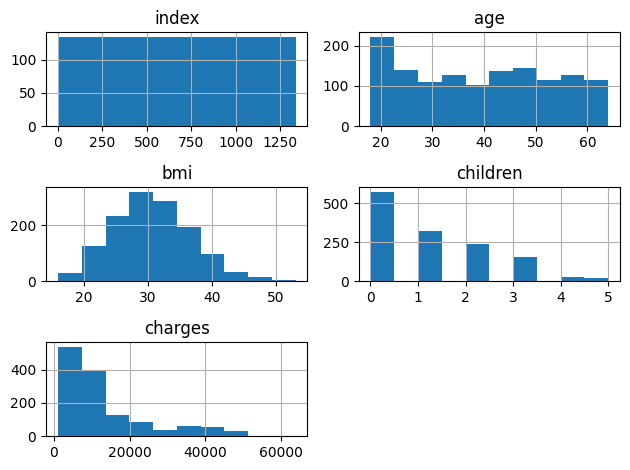

In [10]:
numeric.hist()
plt.tight_layout()

In [11]:
sorted=np.sort(df['bmi'])

In [12]:
q1=np.percentile(sorted,25,method='midpoint')
q3=np.percentile(sorted,75,method='midpoint')
iqr=q3-q1
q1,q3,iqr

(np.float64(26.302500000000002),
 np.float64(34.6875),
 np.float64(8.384999999999998))

In [13]:
lower_limit=q1-(1.5*iqr)
upper_limit=q3+(1.5*iqr)
lower_limit,upper_limit

(np.float64(13.725000000000005), np.float64(47.265))

In [14]:
outliers=[]
for i in df['bmi']:
    if i<lower_limit or i>upper_limit:
        outliers.append(i)
outliers,len(outliers)        

([49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13], 9)

In [15]:
outlier_index=df[df['bmi'].isin(outliers)].index

In [16]:
df.drop(outlier_index, inplace=True)

In [17]:
df.shape

(1329, 8)

In [18]:
sorted=np.sort(df['charges'])

In [19]:
q1=np.percentile(sorted,25,method='midpoint')
q3=np.percentile(sorted,75,method='midpoint')
q1,q3

(np.float64(4738.2682), np.float64(16586.49771))

In [20]:
iqr=q3-q1
iqr

np.float64(11848.22951)

In [21]:
lower_limit=q1-(1.5*iqr)
upper_limit=q3+(1.5*iqr)
lower_limit,upper_limit

(np.float64(-13034.076065), np.float64(34358.841975))

In [22]:
outliers=[]
for i in df['charges']:
    if i<lower_limit or i>upper_limit:
        outliers.append(i)
outliers,len(outliers)    

([39611.7577,
  36837.467,
  37701.8768,
  38711.0,
  35585.576,
  51194.55914,
  39774.2763,
  48173.361,
  38709.176,
  37742.5757,
  47496.49445,
  37165.1638,
  39836.519,
  43578.9394,
  47291.055,
  47055.5321,
  39556.4945,
  40720.55105,
  36950.2567,
  36149.4835,
  48824.45,
  43753.33705,
  37133.8982,
  34779.615,
  38511.6283,
  35160.13457,
  47305.305,
  44260.7499,
  41097.16175,
  43921.1837,
  36219.40545,
  46151.1245,
  42856.838,
  48549.17835,
  47896.79135,
  42112.2356,
  38746.3551,
  42124.5153,
  34838.873,
  35491.64,
  42760.5022,
  47928.03,
  48517.56315,
  41919.097,
  36085.219,
  38126.2465,
  42303.69215,
  46889.2612,
  46599.1084,
  39125.33225,
  37079.372,
  35147.52848,
  48885.13561,
  36197.699,
  38245.59327,
  48675.5177,
  45863.205,
  39983.42595,
  45702.02235,
  58571.07448,
  43943.8761,
  39241.442,
  42969.8527,
  34439.8559,
  40182.246,
  34617.84065,
  42983.4585,
  42560.4304,
  40003.33225,
  45710.20785,
  46200.9851,
  46130.526

Use capping

In [23]:
df['charges']=df['charges'].clip(lower=lower_limit,upper=upper_limit)

<Axes: ylabel='charges'>

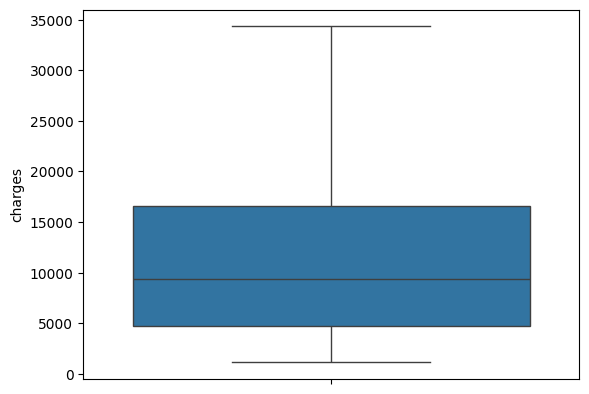

In [24]:
sns.boxplot(df['charges'])

In [25]:
box=df.select_dtypes(include=['int64','float64'])

<Axes: >

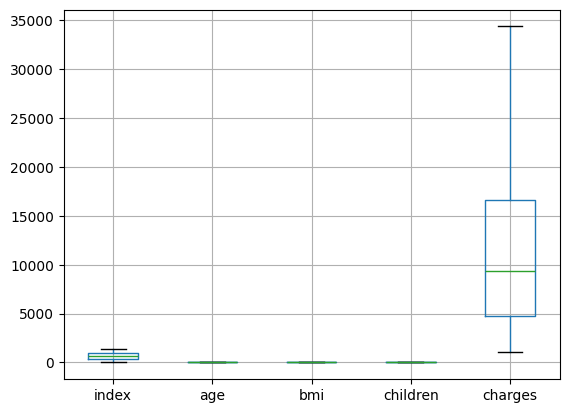

In [26]:
box.boxplot()

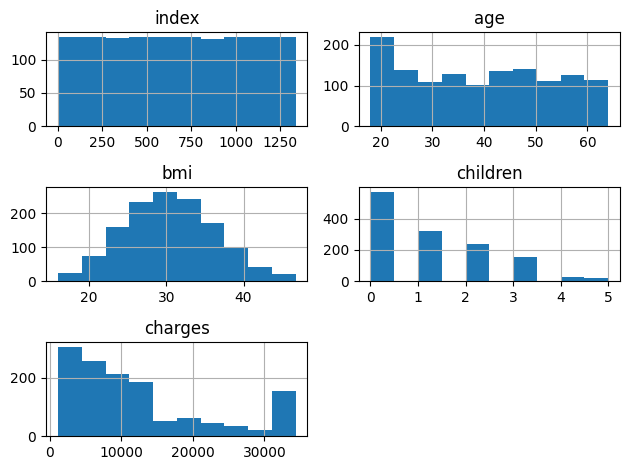

In [27]:
box.hist()
plt.tight_layout()

<Axes: xlabel='age', ylabel='bmi'>

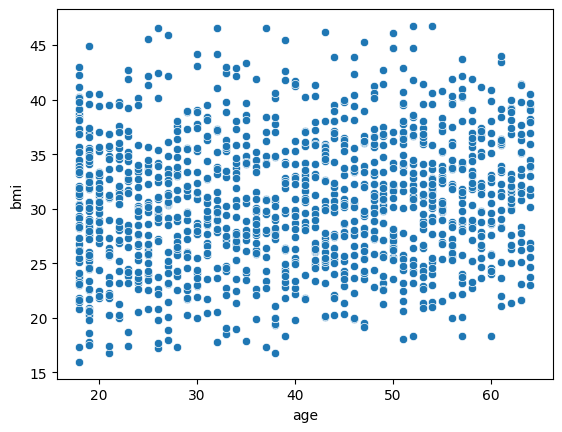

In [30]:
sns.scatterplot(x='age',y='bmi',data=df)

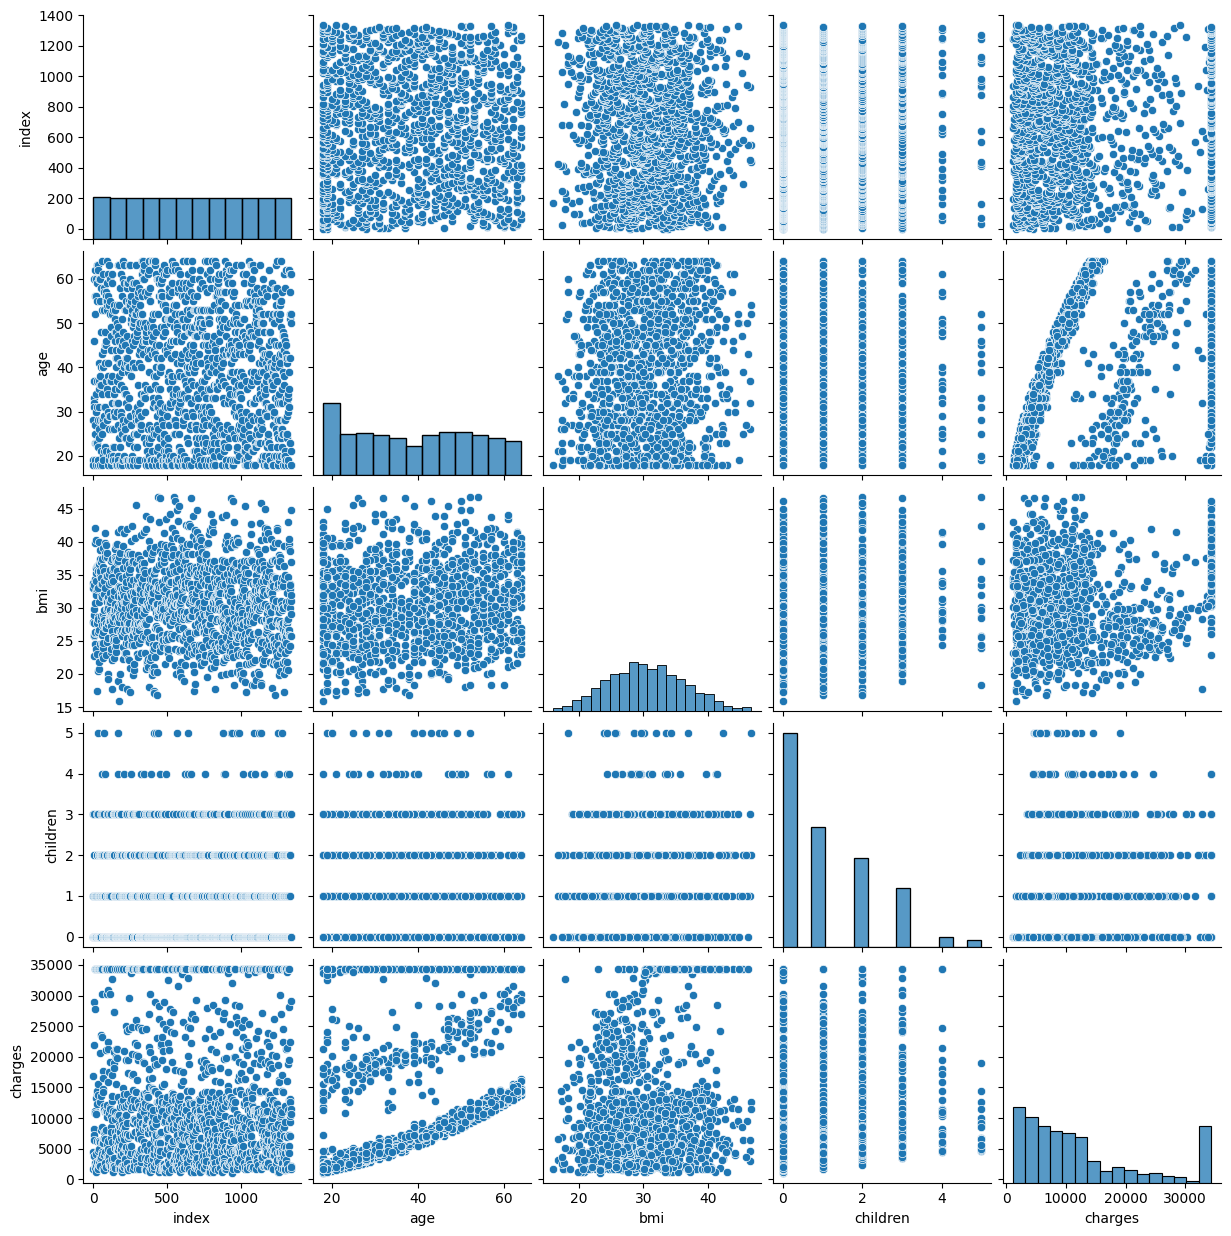

In [31]:
sns.pairplot(df)